Analysis of AB interaction with memory

In [12]:
#set up the environment
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from os import walk,getcwd
import matplotlib.pyplot as plt
#custom helper functions for reading in data files and performing key analysis steps
%run AB_mem_helper_funcs.py
curwd = getcwd()
mypath = "data"
pd.options.mode.chained_assignment = None  # default='warn'

In [15]:
#find the data file paths
dataFiles = list(walk(mypath))[0][2]
dataFiles = Series([curwd + '\\' + mypath +'\\'+ file for file in dataFiles])


In [17]:
dataFiles

0     C:\Users\dtf8829\Documents\ABmem\data\PPT06_AB...
1     C:\Users\dtf8829\Documents\ABmem\data\PPT07_AB...
2     C:\Users\dtf8829\Documents\ABmem\data\PPT08_AB...
3     C:\Users\dtf8829\Documents\ABmem\data\PPT09_AB...
4     C:\Users\dtf8829\Documents\ABmem\data\PPT10_AB...
5     C:\Users\dtf8829\Documents\ABmem\data\PPT11_AB...
6     C:\Users\dtf8829\Documents\ABmem\data\PPT12_AB...
7     C:\Users\dtf8829\Documents\ABmem\data\PPT14_AB...
8     C:\Users\dtf8829\Documents\ABmem\data\PPT15_AB...
9     C:\Users\dtf8829\Documents\ABmem\data\PPT16_AB...
10    C:\Users\dtf8829\Documents\ABmem\data\PPT17_AB...
11    C:\Users\dtf8829\Documents\ABmem\data\PPT18_AB...
12    C:\Users\dtf8829\Documents\ABmem\data\PPT19_AB...
13    C:\Users\dtf8829\Documents\ABmem\data\PPT20_AB...
14    C:\Users\dtf8829\Documents\ABmem\data\PPT21_AB...
15    C:\Users\dtf8829\Documents\ABmem\data\PPT22_AB...
16    C:\Users\dtf8829\Documents\ABmem\data\PPT23_AB...
17    C:\Users\dtf8829\Documents\ABmem\data\PPT2

In [19]:
#find all the relevant summary stats for each data file
allDat = dataFiles.map(readDataFile)

In [20]:
DataFrame(allDat[4])


,2022-06-29_10h58.31.945
ABT1overall,0.918301
ABT2overall,0.869281
blinkFam,4.451429
nonBlinkFam,4.500972
Lag5_T1P_T2A_T1,0.750000
...,...
Nov_2,5.000000
Nov_3,4.000000
Nov_4,3.000000
Nov_5,1.000000


In [21]:
#aggregate the summaries into a dataframe
df = DataFrame()
for row in allDat: 
    df = df.add(DataFrame(row), fill_value = 0)
df = df.T

In [22]:
df.columns

Index(['ABT1overall', 'ABT2overall', 'DistALL_1', 'DistALL_2', 'DistALL_3',
       'DistALL_4', 'DistALL_5', 'DistALL_6', 'DistALL_UVSD_d',
       'DistALL_UVSD_s', 'Dist_1', 'Dist_2', 'Dist_3', 'Dist_4', 'Dist_5',
       'Dist_6', 'Dist_UVSD_d', 'Dist_UVSD_s', 'L1blink_1', 'L1blink_2',
       'L1blink_3', 'L1blink_4', 'L1blink_5', 'L1blink_6', 'L1blink_UVSD_d',
       'L1blink_UVSD_s', 'L1cor_1', 'L1cor_2', 'L1cor_3', 'L1cor_4', 'L1cor_5',
       'L1cor_6', 'L1cor_UVSD_d', 'L1cor_UVSD_s', 'L5_1', 'L5_2', 'L5_3',
       'L5_4', 'L5_5', 'L5_6', 'L5_UVSD_d', 'L5_UVSD_s', 'Lag1_T1A_T2A_T1',
       'Lag1_T1A_T2A_T2', 'Lag1_T1A_T2A_T2_T1', 'Lag1_T1A_T2P_T1',
       'Lag1_T1A_T2P_T2', 'Lag1_T1A_T2P_T2_T1', 'Lag1_T1P_T2A_T1',
       'Lag1_T1P_T2A_T2', 'Lag1_T1P_T2A_T2_T1', 'Lag1_T1P_T2P_T1',
       'Lag1_T1P_T2P_T2', 'Lag1_T1P_T2P_T2_T1', 'Lag5_T1A_T2A_T1',
       'Lag5_T1A_T2A_T2', 'Lag5_T1A_T2A_T2_T1', 'Lag5_T1A_T2P_T1',
       'Lag5_T1A_T2P_T2', 'Lag5_T1A_T2P_T2_T1', 'Lag5_T1P_T2A_T1',
   

In [23]:
df['blinkMag'] = df['Lag5_T1P_T2P_T2_T1'] - df['Lag1_T1P_T2P_T2_T1']
df.to_csv(r'test.csv')

Data cleaning:
1) Participants must have at least .2 for Overall T1 % correct.
2) Participants must have at least .4 of novel images correctly rejected in the mem phase of the study.
3) Participants must have at least .4 for T2 % correct at lag5 on trials where both T1 and T2 were present.
Participants failing these criteria are likely to have been unfocused throughout the task or misunderstood the instructions.


In [9]:
#implement criterion 1:
df = df.loc[df['ABT1overall']>.5, :]
#implement criterion 2:
df = df.loc[df['TargALL_UVSD_d']>.1, :]
#implement criterion 3:
df = df.loc[df['Lag5_T1P_T2P_T2']>.4, :]

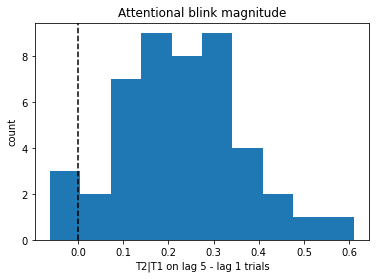

In [20]:
#Use this
#how big is the attentional blink we observe? 
plt.hist(df['blinkMag'])
plt.ylabel('count')
plt.xlabel('T2|T1 on lag 5 - lag 1 trials')
plt.title('Attentional blink magnitude')
plt.axvline(x=0, color = 'k', linestyle='--')

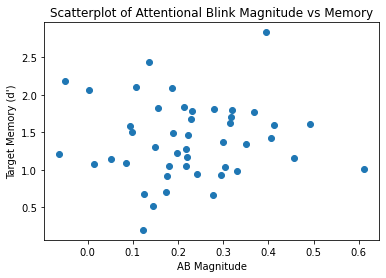

In [13]:
#Use this
#does a bigger attentional blink (worse performance) lead to better memory on a subject level? 
plt.scatter(df['blinkMag'], df['TargALL_UVSD_d'])
plt.xlabel('AB Magnitude')
plt.ylabel('Target Memory (d\')')
plt.title('Scatterplot of Attentional Blink Magnitude vs Memory')
plt.show()

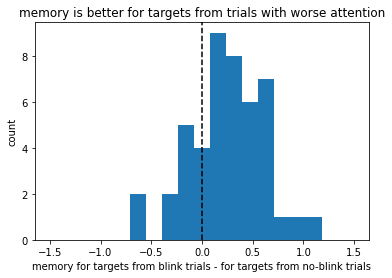

In [19]:
#Use this
#does spending more time (and causing an attentional blink) on T1 lead to better memory on an item level? 
plt.hist(df['L1blink_UVSD_d'] - df['L1cor_UVSD_d'], np.linspace(-1.5,1.5,20))
plt.ylabel('count')
plt.xlabel('memory for targets from blink trials - for targets from no-blink trials')
plt.title('memory is better for targets from trials with worse attention')
plt.axvline(x=0, color = 'k', linestyle='--')

In [21]:
np.mean(df['L1blink_UVSD_d'] - df['L1cor_UVSD_d'])

0.24775459949151282

In [22]:
from scipy.stats import ttest_1samp


ttest_1samp(df['L1blink_UVSD_d'] - df['L1cor_UVSD_d'], 0)


Ttest_1sampResult(statistic=4.589102447620353, pvalue=3.5636293408066095e-05)

In [23]:
ttest_1samp(df['PP1blink_mem'] - df['PP1cor_mem'], 0)



Ttest_1sampResult(statistic=3.8808135131024493, pvalue=0.00033727415090790264)

In [24]:
len(df)

46

(array([3., 2., 2., 8., 8., 8., 9., 2., 1., 3.]),
 array([0.09921457, 0.31140234, 0.52359011, 0.73577789, 0.94796566,
        1.16015344, 1.37234121, 1.58452898, 1.79671676, 2.00890453,
        2.22109231]),
 <BarContainer object of 10 artists>)

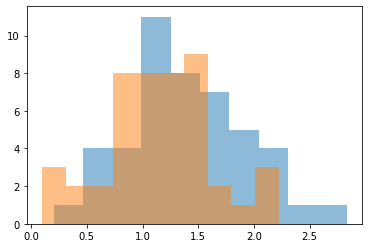

In [30]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
#data

plt.hist(df['TargALL_UVSD_d'], alpha=0.5)



plt.hist(df['DistALL_UVSD_d'], alpha=0.5)


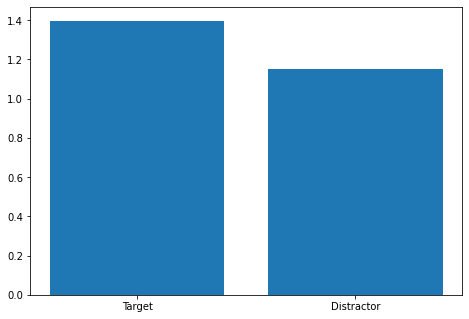

In [25]:
#use this
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['Target', 'Distractor']
Memory = ['TargALL_UVSD_d', 'DistALL_UVSD_d']
ax.bar(section,ColumnMeans[Memory])
plt.ylabel('d\' memory score')
plt.title('memory for different types of')
plt.show()

In [48]:
ColumnMeans = df.apply(np.mean)

In [31]:
ColumnMeans[Memory]

TargALL_UVSD_d    1.398345
DistALL_UVSD_d    1.151530
dtype: float64

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.07158866, 0.17158866, 0.27158866, 0.37158866, 0.47158866,
        0.57158866, 0.67158866, 0.77158866, 0.87158866, 0.97158866,
        1.07158866]),
 <BarContainer object of 10 artists>)

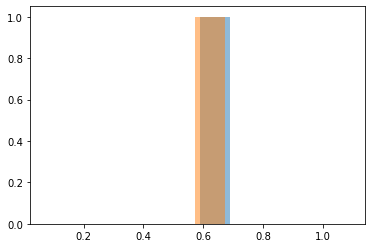

In [50]:
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
#data

plt.hist(ColumnMeans['PP1cor_mem'], alpha=0.5)



plt.hist(ColumnMeans['PP5cor_mem'], alpha=0.5)




(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.22551462, 0.32551462, 0.42551462, 0.52551462, 0.62551462,
        0.72551462, 0.82551462, 0.92551462, 1.02551462, 1.12551462,
        1.22551462]),
 <BarContainer object of 10 artists>)

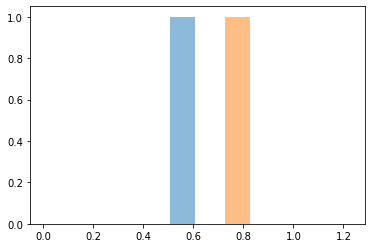

In [51]:
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
#data

plt.hist(ColumnMeans['Lag1_T1P_T2P_T2_T1'], alpha=0.5)



plt.hist(ColumnMeans['Lag5_T1P_T2P_T2_T1'], alpha=0.5)




(0.0, 3.0)

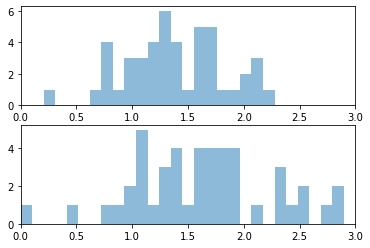

In [37]:
#use 1 and 3
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
plt.hist(df['L1cor_UVSD_d'], np.linspace(0,3,30), alpha=0.5)
plt.xlim([0,3])
ax3 = fig.add_subplot(2,1,2)
plt.hist(df['L1blink_UVSD_d'],np.linspace(0,3,30), alpha=0.5)
plt.xlim([0,3])

In [53]:
df.loc[df['PP1blink_mem']<0.5,:]

,ABT1overall,ABT2overall,Lag1_T1A_T2A_T1,Lag1_T1A_T2A_T2,Lag1_T1A_T2A_T2_T1,Lag1_T1A_T2P_T1,Lag1_T1A_T2P_T2,Lag1_T1A_T2P_T2_T1,Lag1_T1P_T2A_T1,Lag1_T1P_T2A_T2,...,PP1cor_mem,PP1miss_mem,PP5cor_mem,T1Overall,T2Overall,distMem,distracter_mem,novel_mem,targMem,blinkMag
2022-06-29_10h58.31.945,0.918301,0.869281,1.0,0.9,0.900000,0.964286,0.928571,0.925926,0.892857,0.821429,...,0.338028,0.000000,0.444444,0.382114,0.355932,0.852321,0.480769,0.956757,0.724590,-0.062500
2022-06-30_09h08.37.319,0.084967,0.179739,0.0,0.1,NaN,0.035714,0.214286,0.000000,0.142857,0.035714,...,0.000000,0.491228,0.000000,0.000000,0.529412,0.873418,0.576923,0.956757,0.797794,0.166667
2022-07-01_17h04.12.064,0.862745,0.611111,1.0,0.6,0.600000,1.000000,0.642857,0.642857,0.821429,0.857143,...,0.222222,0.200000,0.200000,0.227273,0.173913,0.801688,0.134615,0.989189,0.700680,0.277992
2022-07-04_13h57.02.679,0.875817,0.565359,0.9,1.0,1.000000,1.000000,0.321429,0.321429,0.821429,0.928571,...,0.392857,0.000000,0.333333,0.370690,0.343750,0.797468,0.442308,0.897297,0.685811,0.174253
2022-07-06_10h02.29.464,0.784314,0.637255,0.9,0.9,0.888889,1.000000,0.571429,0.571429,0.642857,0.928571,...,0.148148,0.200000,0.181818,0.238095,0.202899,0.392405,0.346154,0.405405,0.350515,0.203578
2022-07-07_13h31.02.890,0.869281,0.581699,1.0,1.0,1.000000,1.000000,0.607143,0.607143,0.714286,1.000000,...,0.111111,1.000000,0.130435,0.157895,0.214286,0.324895,0.557692,0.259459,0.246575,0.549784
2022-07-07_14h52.56.649,0.725490,0.415033,0.9,1.0,1.000000,1.000000,0.071429,0.071429,0.642857,1.000000,...,0.222222,0.187500,0.285714,0.277778,0.266667,0.717300,0.134615,0.881081,0.670290,0.168564
2022-07-08_10h00.24.019,0.803922,0.683007,0.8,0.3,0.250000,0.785714,0.464286,0.454545,0.821429,0.428571,...,0.446429,0.333333,0.593750,0.451327,0.475728,0.569620,0.403846,0.616216,0.551495,0.122556


(array([ 1.,  1.,  3.,  3.,  1.,  6., 13., 14.,  7.,  4.]),
 array([0.        , 0.08717949, 0.17435897, 0.26153846, 0.34871795,
        0.43589744, 0.52307692, 0.61025641, 0.6974359 , 0.78461538,
        0.87179487]),
 <BarContainer object of 10 artists>)

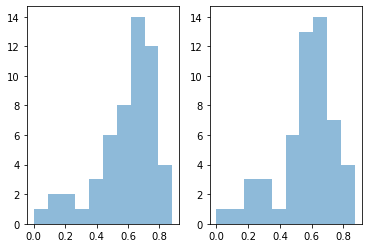

In [54]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.hist(df['PP1cor_mem'], alpha=0.5)
ax2 = fig.add_subplot(1,2,2)
plt.hist(df['PP5cor_mem'], alpha=0.5)


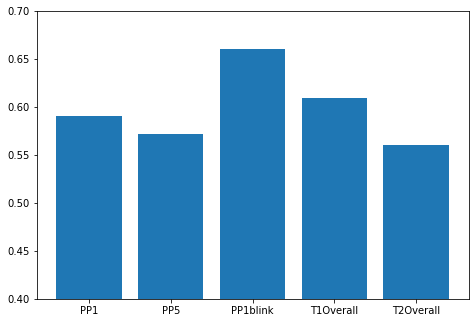

In [55]:
ColumnMeans = df.apply(np.mean)
ColumnSD = df.apply(np.std)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['PP1', 'PP5', 'PP1blink', 'T1Overall', 'T2Overall']
CorMem = ['PP1cor_mem', 'PP5cor_mem', 'PP1blink_mem', 'T1Overall', 'T2Overall']
ax.bar(section,ColumnMeans[CorMem])
plt.ylim([0.4,0.7])
plt.show()

In [56]:
ColumnSD

ABT1overall           0.115956
ABT2overall           0.134441
Lag1_T1A_T2A_T1       0.143545
Lag1_T1A_T2A_T2       0.202477
Lag1_T1A_T2A_T2_T1    0.178986
Lag1_T1A_T2P_T1       0.142590
Lag1_T1A_T2P_T2       0.219024
Lag1_T1A_T2P_T2_T1    0.226854
Lag1_T1P_T2A_T1       0.118675
Lag1_T1P_T2A_T2       0.174157
Lag1_T1P_T2A_T2_T1    0.185066
Lag1_T1P_T2P_T1       0.122473
Lag1_T1P_T2P_T2       0.191982
Lag1_T1P_T2P_T2_T1    0.204221
Lag5_T1A_T2A_T1       0.153237
Lag5_T1A_T2A_T2       0.227325
Lag5_T1A_T2A_T2_T1    0.197946
Lag5_T1A_T2P_T1       0.141237
Lag5_T1A_T2P_T2       0.176422
Lag5_T1A_T2P_T2_T1    0.193390
Lag5_T1P_T2A_T1       0.121630
Lag5_T1P_T2A_T2       0.167493
Lag5_T1P_T2A_T2_T1    0.174781
Lag5_T1P_T2P_T1       0.123608
Lag5_T1P_T2P_T2       0.185455
Lag5_T1P_T2P_T2_T1    0.178508
PP1T2_mem             0.260273
PP1blink_mem          0.197281
PP1cor_mem            0.191442
PP1miss_mem           0.318603
PP5cor_mem            0.182946
T1Overall             0.176163
T2Overal

In [57]:
.2/np.sqrt(20)

0.044721359549995794

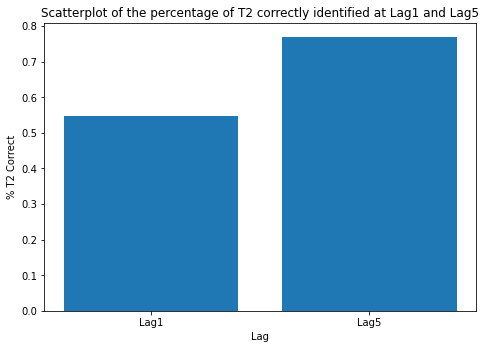

In [38]:
#use this
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['Lag1', 'Lag5']
CorMem = ['Lag1_T1P_T2P_T2_T1', 'Lag5_T1P_T2P_T2_T1']
ax.bar(section,ColumnMeans[CorMem])
plt.xlabel('Lag')
plt.ylabel('% T2 Correct')
plt.title('Scatterplot of the percentage of T2 correctly identified at Lag1 and Lag5')
plt.show()


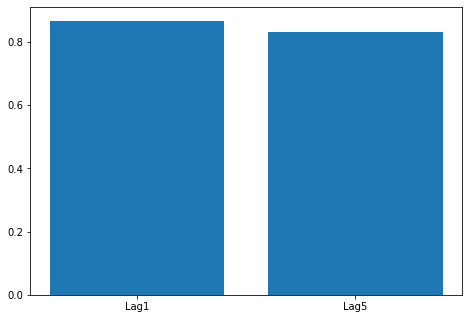

In [59]:
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['Lag1', 'Lag5']
CorMem = ['Lag1_T1P_T2P_T1', 'Lag5_T1P_T2P_T1']
ax.bar(section,ColumnMeans[CorMem])

plt.show()


KeyError: 'key of type tuple not found and not a MultiIndex'

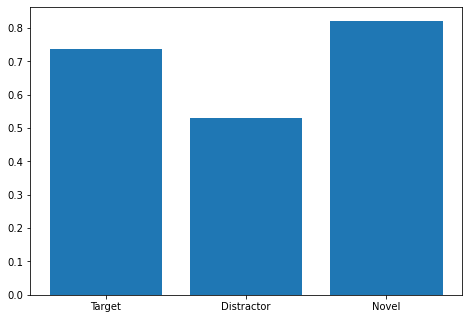

In [60]:
#calculate means
ColumnMeans = df.apply(np.mean)
#calculate the standard deviation
ColumnSD = df.apply(np.std)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#data
section = ['Target', 'Distractor', 'Novel']
Memory = ['targMem', 'distracter_mem', 'novel_mem']
ax.bar(section,ColumnMeans[Memory])
error = [ColumnSD['targMem', 'distracter_mem', 'novel_mem']]
plt.show()

In [ ]:
ColumnSD = df.apply(np.std)

In [63]:
ColumnSD

ABT1overall           0.115956
ABT2overall           0.134441
Lag1_T1A_T2A_T1       0.143545
Lag1_T1A_T2A_T2       0.202477
Lag1_T1A_T2A_T2_T1    0.178986
Lag1_T1A_T2P_T1       0.142590
Lag1_T1A_T2P_T2       0.219024
Lag1_T1A_T2P_T2_T1    0.226854
Lag1_T1P_T2A_T1       0.118675
Lag1_T1P_T2A_T2       0.174157
Lag1_T1P_T2A_T2_T1    0.185066
Lag1_T1P_T2P_T1       0.122473
Lag1_T1P_T2P_T2       0.191982
Lag1_T1P_T2P_T2_T1    0.204221
Lag5_T1A_T2A_T1       0.153237
Lag5_T1A_T2A_T2       0.227325
Lag5_T1A_T2A_T2_T1    0.197946
Lag5_T1A_T2P_T1       0.141237
Lag5_T1A_T2P_T2       0.176422
Lag5_T1A_T2P_T2_T1    0.193390
Lag5_T1P_T2A_T1       0.121630
Lag5_T1P_T2A_T2       0.167493
Lag5_T1P_T2A_T2_T1    0.174781
Lag5_T1P_T2P_T1       0.123608
Lag5_T1P_T2P_T2       0.185455
Lag5_T1P_T2P_T2_T1    0.178508
PP1T2_mem             0.260273
PP1blink_mem          0.197281
PP1cor_mem            0.191442
PP1miss_mem           0.318603
PP5cor_mem            0.182946
T1Overall             0.176163
T2Overal

In [ ]:
#calculate means
ColumnMeans = df.apply(np.mean)
#calculate the standard deviation
ColumnSD = df.apply(np.std)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#data
section = ['Target', 'Distractor', 'Novel']
Memory = ['targMem', 'distracter_mem', 'novel_mem']
ax.bar(section,ColumnMeans[Memory])
ci = 0.1 * np.std / np.mean
plt.show()

(array([ 1.,  0.,  0.,  0.,  0.,  2.,  7., 16., 14., 13.]),
 array([0.14285714, 0.22142857, 0.3       , 0.37857143, 0.45714286,
        0.53571429, 0.61428571, 0.69285714, 0.77142857, 0.85      ,
        0.92857143]),
 <BarContainer object of 10 artists>)

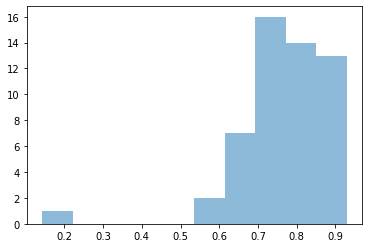

In [67]:
#USE-DATA CLEANING
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['Lag1_T1P_T2A_T1'], alpha=0.5)



(array([ 1.,  0.,  0.,  0.,  2.,  3.,  7., 16., 15.,  9.]),
 array([0.14285714, 0.21785714, 0.29285714, 0.36785714, 0.44285714,
        0.51785714, 0.59285714, 0.66785714, 0.74285714, 0.81785714,
        0.89285714]),
 <BarContainer object of 10 artists>)

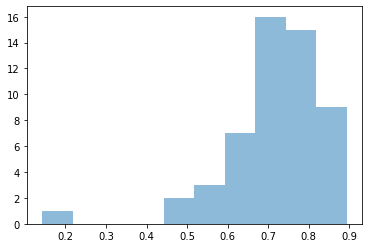

In [68]:
#USE-DATA CLEANING
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['Lag5_T1P_T2A_T1'], alpha=0.5)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14., 36.]),
 array([0.08496732, 0.16993464, 0.25490196, 0.33986928, 0.4248366 ,
        0.50980392, 0.59477124, 0.67973856, 0.76470588, 0.8496732 ,
        0.93464052]),
 <BarContainer object of 10 artists>)

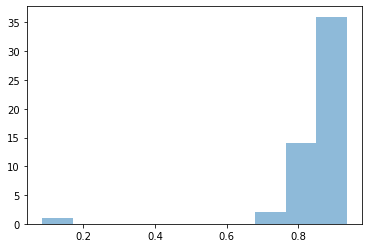

In [69]:
#USE-DATA CLEANING
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['ABT1overall'], alpha=0.5)

In [ ]:
#DON'T NEED TO USE
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['ABT2overall'], alpha=0.5)

(array([ 2.,  0.,  2.,  0.,  1.,  3., 13.,  5., 13., 14.]),
 array([0.09302326, 0.17674419, 0.26046512, 0.34418605, 0.42790698,
        0.51162791, 0.59534884, 0.67906977, 0.7627907 , 0.84651163,
        0.93023256]),
 <BarContainer object of 10 artists>)

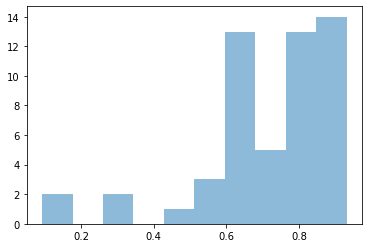

In [70]:
#use this
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['Lag5_T1P_T2P_T2'], alpha=0.5)

(array([ 3.,  2.,  2.,  3.,  3., 11.,  2., 13.,  7.,  7.]),
 array([0.17241379, 0.24137931, 0.31034483, 0.37931034, 0.44827586,
        0.51724138, 0.5862069 , 0.65517241, 0.72413793, 0.79310345,
        0.86206897]),
 <BarContainer object of 10 artists>)

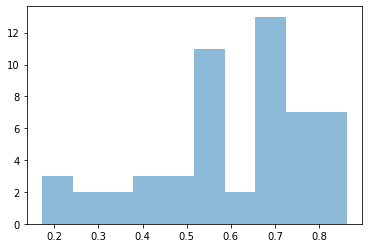

In [71]:
#use this
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['Lag5_T1A_T2P_T2'], alpha=0.5)

In [66]:
df['novel_mem'].values

array([0.88648649, 0.91351351, 0.80540541, 0.90810811, 0.95675676,
       0.72432432, 0.87567568, 0.9027027 , 0.95675676, 0.84864865,
       0.96756757, 0.87567568, 0.75135135, 0.76216216, 0.88108108,
       0.85405405, 0.85405405, 0.81081081, 0.98918919, 0.87567568,
       0.8972973 , 0.93513514, 0.8972973 , 0.51351351, 0.94054054,
       0.9027027 , 0.74054054, 0.63783784, 0.87567568, 0.40540541,
       0.92432432, 0.75675676, 0.94054054, 0.88108108, 0.25945946,
       0.88108108, 0.61621622, 0.70810811, 0.96756757, 0.8       ,
       0.95675676, 0.95135135, 0.77837838, 0.59459459, 0.65945946,
       0.93513514, 0.92432432, 0.81081081, 0.81081081, 0.78378378,
       0.9027027 , 0.76756757, 0.83243243])

(array([ 1.,  0.,  1.,  1.,  2.,  2.,  7.,  8., 18., 13.]),
 array([0.25945946, 0.33243243, 0.40540541, 0.47837838, 0.55135135,
        0.62432432, 0.6972973 , 0.77027027, 0.84324324, 0.91621622,
        0.98918919]),
 <BarContainer object of 10 artists>)

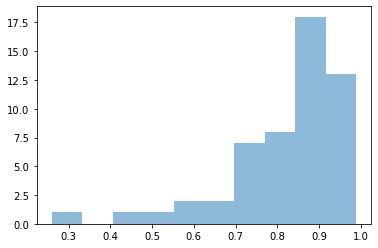

In [72]:
#use this
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.hist(df['novel_mem'], alpha=0.5)